# GMSC Analysis

The main objective is to explore GMSC data (100AA smORFs) by generating rarefaction curves, which is a measure of biodiversity, helping to understand the richness for each habitat.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import random

In [2]:
habitat2color = {
    'Air': '#98d7d9',
    'Anthropogenic': '#11a837',
    'Cat gut': '#553105ff',
    'Dog gut': '#93570fff',
    'Human gut': '#dd861dff',
    'Human gut 0.05': '#d0d2d6',
    'Human gut 0.01': '#d0d2d6',
    'Pig gut' : '#fec008ff',
    'Mouse gut': '#ba1902ff',
    'Human nose': '#792597ff',
    'Human oral': '#82bb47ff',
    'Human skin': '#c797d0ff',
    'Human vagina': '#7c9dd9ff',
    'Aquatic': '#0522bbff',
    'Marine': '#0522bbff',
    'Soil': '#028f00ff',
    'Built environment': '#000000e6',
    'Freshwater': '#0076d5ff',
    'Wastewater': '#767171ff',
    'Other human': '#792597ff',
    'Mammal gut': '#966906fd',
    'Plant associated': '#78c48a',
    'Soil/plant': '#78c48a',
    'Water associated': '#024a5c',
    'Human mouth': '#bf5c97',
    'Other animal': '#878a8a',
    'Other': '#000000'
}

In [3]:
n_perms = 24

results_dir = 'rarefaction_results/high/'

high_envs = os.listdir(results_dir)

envs_df = pd.DataFrame()

for env in high_envs:
    df = pd.concat([pd.read_csv(results_dir + env + '/perm_' + str(i) + '.tsv', sep = '\t') for i in range(n_perms)]).groupby(level=0).mean()
    df['smorfs'] = df['smorfs']/1e6
    df['env'] = env.replace('_', ' ').replace('-', '/').capitalize()

    envs_df = envs_df.append(df)

envs_df = envs_df.reset_index(drop=True)

In [4]:
env = 'human_gut'
human_df = pd.concat([pd.read_csv(results_dir + env + '/perm_' + str(i) + '.tsv', sep = '\t') for i in range(n_perms)]).groupby(level=0).mean()
human_df['smorfs'] = human_df['smorfs']/1e6
human_df['env'] = env.replace('_', ' ').replace('-', '/').capitalize()

human_df

,k,smorfs,env
0,1.0,0.028043,Human gut
1,2.0,0.048927,Human gut
2,3.0,0.074742,Human gut
3,4.0,0.090063,Human gut
4,5.0,0.113014,Human gut
...,...,...,...
32922,32923.0,113.418618,Human gut
32923,32924.0,113.420645,Human gut
32924,32925.0,113.422663,Human gut
32925,32926.0,113.424342,Human gut


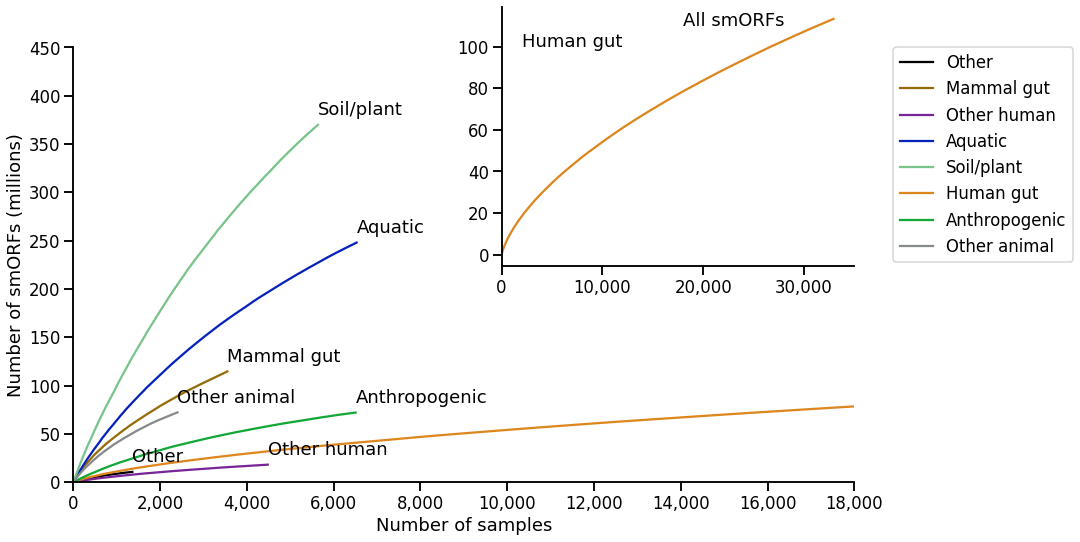

In [5]:
sns.set_context("talk")

fig, ax = plt.subplots()

sns.lineplot(data = envs_df, x = 'k', y = 'smorfs', hue = 'env', palette = habitat2color, ax = ax)
ax.set_xlim([0, 18000])
ax.set_ylim([0, 450])
ax.set_xlabel('Number of samples')
ax.set_ylabel('Number of smORFs (millions)')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

lines = envs_df.groupby('env').max()

no_plot = ['Human gut']

for line in lines.index:
     if line not in no_plot:
          plt.text(lines.loc[line]['k'], lines.loc[line]['smorfs'] + 10, line, horizontalalignment='left', size='medium', color='black')

ax2 = plt.axes([0.55, 0.5, 0.35, 0.45])

sns.lineplot(data = human_df, x = 'k', y = 'smorfs', hue = 'env', palette=habitat2color, ax = ax2)
ax2.set_xlim([0, 35000])
ax2.set(xlabel = None, ylabel = None)
ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.legend([],[], frameon=False)
ax2.set_xticks(range(0, 40000, 10000))
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.text(2000, 100, 'Human gut', horizontalalignment='left', size='medium', color='black')
plt.text(18000, 110, 'All smORFs', horizontalalignment='left', size='medium', color='black')
#plt.text(2000, 100, 'Human gut', horizontalalignment='left', size='medium', color='black')

plt.gcf().set_size_inches(14, 8)

In [6]:
n_perms = 24

results_dir = 'rarefaction_results/general/'

high_envs = os.listdir(results_dir)

envs_df = pd.DataFrame()

for env in high_envs:
    df = pd.concat([pd.read_csv(results_dir + env + '/perm_' + str(i) + '.tsv', sep = '\t') for i in range(n_perms)]).groupby(level=0).mean()
    df['smorfs'] = df['smorfs']/1e6
    df['env'] = env.replace('_', ' ').replace('-', '/').capitalize()

    envs_df = envs_df.append(df)

envs_df = envs_df.reset_index(drop=True)

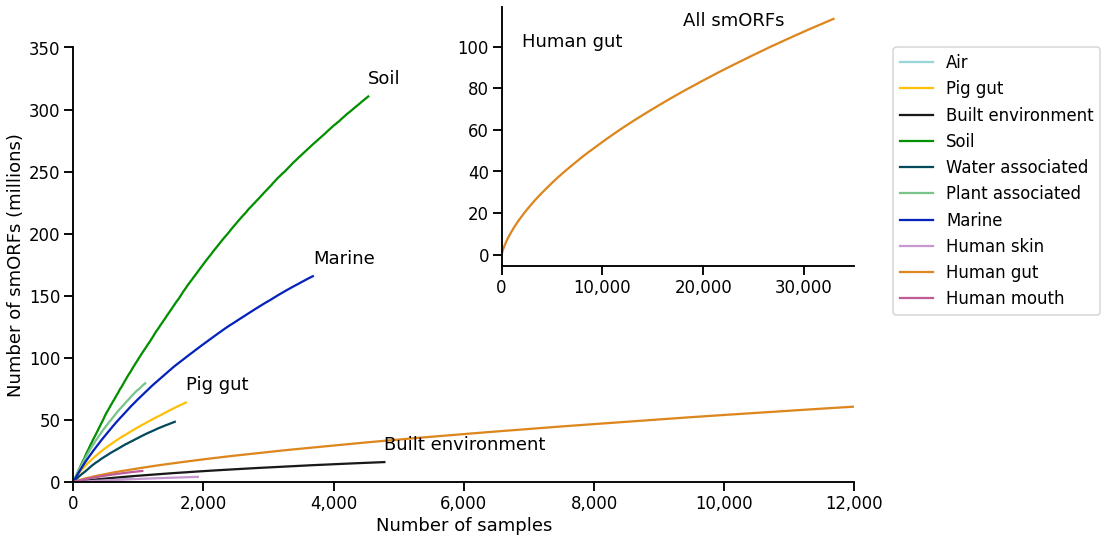

In [7]:
sns.set_context("talk")

fig, ax = plt.subplots()

sns.lineplot(data = envs_df, x = 'k', y = 'smorfs', hue = 'env', palette = habitat2color, ax = ax)
ax.set_xlim([0, 12000])
ax.set_ylim([0, 350])
ax.set_xlabel('Number of samples')
ax.set_ylabel('Number of smORFs (millions)')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

lines = envs_df.groupby('env').max()

no_plot = ['Human gut', 'Plant associated', 'Water associated', 'Air', 'Human skin', 'Human mouth']

for line in lines.index:
     if line not in no_plot:
          plt.text(lines.loc[line]['k'], lines.loc[line]['smorfs'] + 10, line, horizontalalignment='left', size='medium', color='black')

ax2 = plt.axes([0.55, 0.5, 0.35, 0.45])

sns.lineplot(data = human_df, x = 'k', y = 'smorfs', hue = 'env', palette=habitat2color, ax = ax2)
ax2.set_xlim([0, 35000])
ax2.set(xlabel = None, ylabel = None)
ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.legend([],[], frameon=False)
ax2.set_xticks(range(0, 40000, 10000))
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.text(2000, 100, 'Human gut', horizontalalignment='left', size='medium', color='black')
plt.text(18000, 110, 'All smORFs', horizontalalignment='left', size='medium', color='black')
#plt.text(2000, 100, 'Human gut', horizontalalignment='left', size='medium', color='black')

plt.gcf().set_size_inches(14, 8)